In [27]:
from cellulus.utils.utils import extract_data, visualize
from cellulus.utils.create_dicts import create_dataset_dict, create_model_dict, create_loss_dict, begin_training

ImportError: cannot import name 'create_loss_dict' from 'cellulus.utils.create_dicts' (/Users/lalitm/Desktop/github/cellulus/cellulus/utils/create_dicts.py)

### Download Data

The `TissueNet` dataset, `Version 1.0` was downloaded from the DeepCell website at **[this](https://datasets.deepcell.org/data)** url. <br>The original data contained data for multiple tissue types and was available as numpy zipped files (`*.npz`). <br> We extracted the subset fo data corresponding to `Immune` tissue type, re-saved the dataset as `zarr` files.<br> This data can be downloaded from `zarr_url` to the `data_dir` location, using the `extract_data` method.

In [2]:
data_dir = './'
project_name = 'Immune'

In [3]:
extract_data(
    #zarr_url = 'https://github.com/funkelab/cellulus/releases/download/v0.0.1/Immune.zip',
    zarr_url = 'https://github.com/lmanan/FSD/releases/download/v0.0.1-tag/Immune.zip',
    data_dir = data_dir,
    project_name = project_name
)

Directory already exists at the location ./Immune


### Specify object size in pixels

Set `object_size` to be roughly equal to the average height or width of the object. <br>
This parameter will later be used to identify objects which are roughly of this size.

In [4]:
object_size = 32

### Visualize some of the images in the dataset

We randomly choose $5$ images from `val.zarr` and visualize both the channels in the two rows.

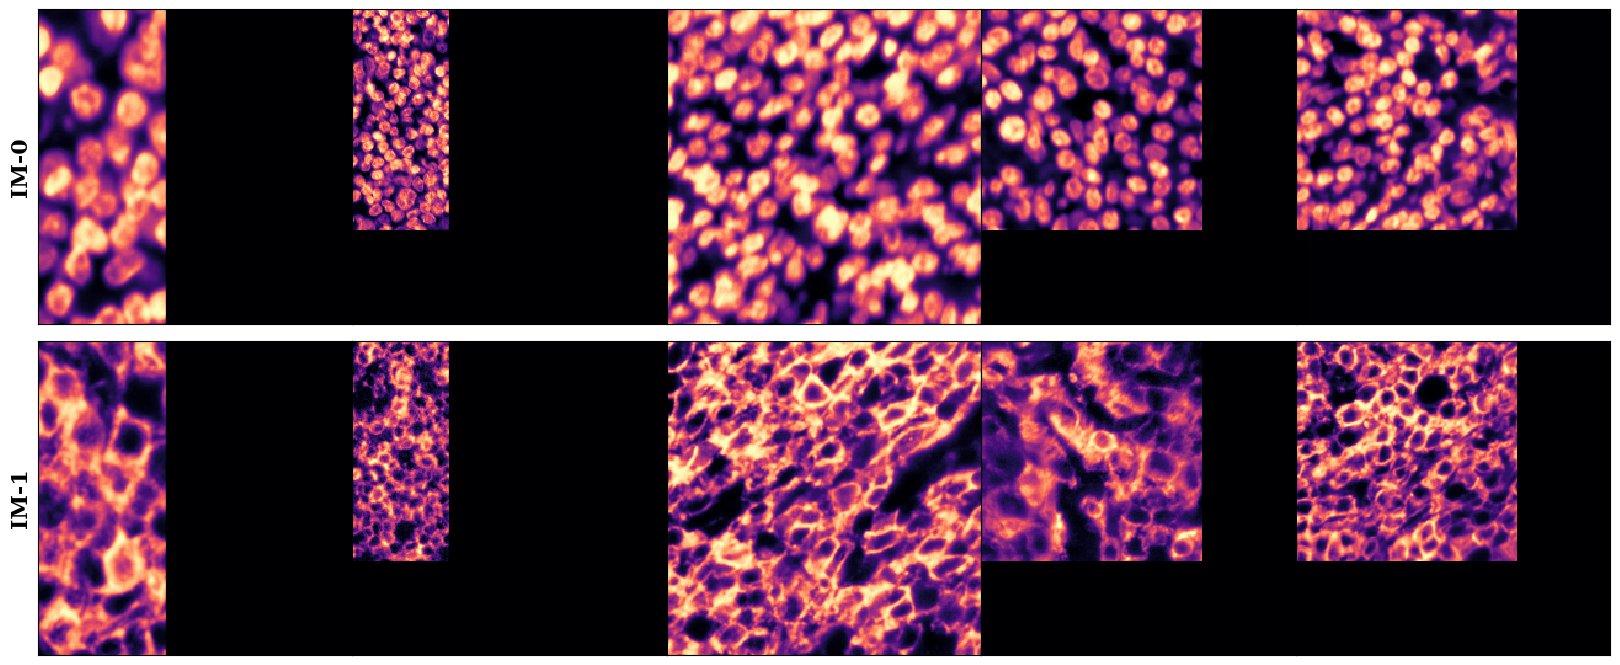

In [19]:
visualize(project_name)

### Create the `train_dataset_dict` dictionary

In [20]:
train_batch_size = 4

In [21]:
train_dataset_dict = create_dataset_dict(data_dir = data_dir, 
                                         project_name = project_name,  
                                         batch_size = train_batch_size, 
                                         type = 'train')

`train_dataset_dict` dictionary successfully created with: 
 -- train images accessed from ./Immune/train.zarr, 
 -- batch size set at 4, 


### Create the `val_dataset_dict` dictionary

In [22]:
val_batch_size = 4

In [26]:
val_dataset_dict = create_dataset_dict(data_dir = data_dir, 
                                         project_name = project_name,  
                                         batch_size = val_batch_size, 
                                         type = 'val')

`val_dataset_dict` dictionary successfully created with: 
 -- val images accessed from ./Immune/val.zarr, 
 -- batch size set at 4, 


### Specify model-related parameters

In [24]:
num_input_channels = 2

### Create the `model_dict` dictionary

In [25]:
model_dict = create_model_dict(num_input_channels = num_input_channels)

`model_dict` dictionary successfully created with: 
 -- num of output channels equal to 2, 
 -- num of input channels equal to 2, 
 -- name equal to UNet2D


### Create the `loss_dict` dictionary

In [ ]:
loss_dict = create_loss_dict(regularization_weight = 1.0)

### Specify training related parameters

In [ ]:
n_epochs = 50
save_dir = os.path.join('project_name', 'experiment')
resume_path  = None

### Create the `configs` dictionary

In [ ]:
configs = create_configs(n_epochs = n_epochs,
                         resume_path = resume_path, 
                         save_dir = save_dir, 
                         )

### Begin training!

Executing the next cell would begin the training.

In [28]:
begin_training(train_dataset_dict, val_dataset_dict, model_dict, loss_dict, configs)

NameError: name 'begin_training' is not defined